### Analyze data for ML model

In [8]:
# Check for time series aspects
print("Time range of the data:")
print(df_filtered['Year'].min(), "to", df_filtered['Year'].max())

# Check the number of data points per entity
print("\nNumber of data points per entity (first 10 entities):")
print(df_filtered['Entity'].value_counts().head(10))

# Analyze the distribution of the target variable
print("\nDescription of Annual CO₂ emissions (tonnes ):")
print(df_filtered['Annual CO₂ emissions (tonnes )'].describe())

Time range of the data:
1751 to 2017

Number of data points per entity (first 10 entities):
Entity
United States     267
United Kingdom    267
India             256
China             254
Canada            233
Germany           226
Poland            218
France            210
Austria           200
Belgium           189
Name: count, dtype: int64

Description of Annual CO₂ emissions (tonnes ):
count    1.837900e+04
mean     7.305381e+07
std      2.826595e+08
min      0.000000e+00
25%      4.325481e+05
50%      3.781248e+06
75%      3.026395e+07
max      2.998434e+09
Name: Annual CO₂ emissions (tonnes ), dtype: float64


### Subtask: Filter out non-country entities

In [7]:
# Find unique entities
unique_entities = df['Entity'].unique()
print("Unique entities in the data:")
print(unique_entities)

# Create a list of non-country entities to remove (add or modify as needed)
non_country_entities = [
    'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
    'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping'
]

# Filter the data to keep only countries
df_filtered = df[~df['Entity'].isin(non_country_entities)].copy()

print("\nData after filtering non-country entities (first 5 rows):")
display(df_filtered.head())
print("\nNumber of rows before filtering:", len(df))
print("Number of rows after filtering:", len(df_filtered))

Unique entities in the data:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Republic of the Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Czechoslovakia' 'Democratic Republic of Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guia

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0



Number of rows before filtering: 18646
Number of rows after filtering: 18379


# Task
Load the data from "/content/co2_emission.csv", display the first few rows and the info of the dataframe, preprocess the data by handling missing values, outliers, and data types if necessary, and finally summarize the preprocessing steps and show the processed data.

## Load the data

### Subtask:
Load the data from "/content/co2_emission.csv" into a dataframe.


**Reasoning**:
Load the data into a pandas DataFrame as instructed.



In [1]:
import pandas as pd
df = pd.read_csv('/content/co2_emission.csv')

**Reasoning**:
The data has been loaded into a dataframe. Display the first few rows to verify the loading.



In [2]:
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Show the data

### Subtask:
Display the first few rows and the info of the dataframe to understand the data.


**Reasoning**:
Display the first few rows and the info of the dataframe to understand the data.



In [3]:
display(df.head())
display(df.info())

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


None

## Preprocess the data

### Subtask:
Handle missing values, outliers, and data types if necessary.


**Reasoning**:
Identify and quantify missing values in each column, and then handle the missing values in the 'Code' column by dropping the rows with missing values.



In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
df.dropna(subset=['Code'], inplace=True)

Missing values in each column:
Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64


**Reasoning**:
Check for outliers in the 'Annual CO₂ emissions (tonnes )' column using a box plot, and then display the data types of the columns.



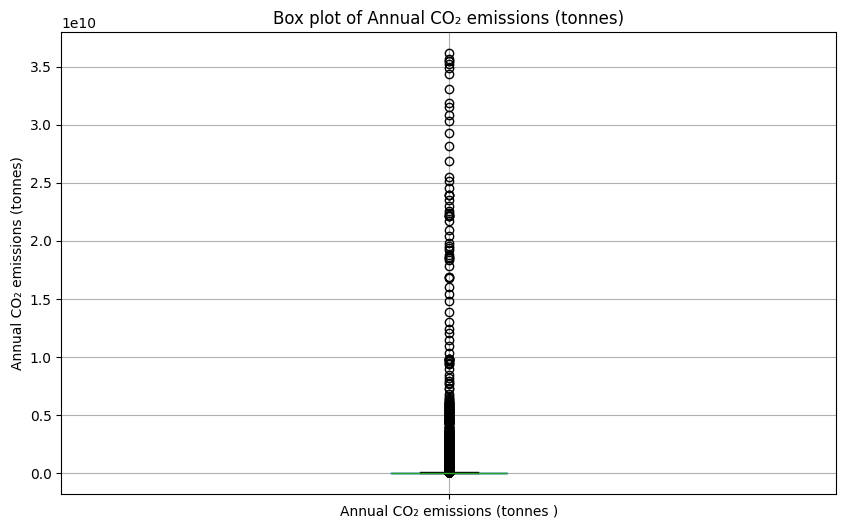


Data types after handling missing values:
Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object


In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column=['Annual CO₂ emissions (tonnes )'])
plt.title('Box plot of Annual CO₂ emissions (tonnes)')
plt.ylabel('Annual CO₂ emissions (tonnes)')
plt.show()
print("\nData types after handling missing values:")
print(df.dtypes)

**Reasoning**:
Based on the box plot, there are significant outliers in the 'Annual CO₂ emissions (tonnes )' column. Given the nature of CO2 emissions data, these extreme values could represent major industrial countries or specific events and might be valid data points rather than errors. Therefore, instead of removing them, which could lead to loss of valuable information, capping the outliers at a reasonable upper limit based on the distribution (e.g., the 99th percentile) is a more appropriate strategy to mitigate their influence on analysis without discarding data. The data types are already appropriate for analysis, so no conversion is needed.



In [6]:
upper_limit = df['Annual CO₂ emissions (tonnes )'].quantile(0.99)
df['Annual CO₂ emissions (tonnes )'] = df['Annual CO₂ emissions (tonnes )'].clip(upper=upper_limit)
print("\nSummary of preprocessing steps:")
print("- Identified and quantified missing values (2207 in 'Code').")
print("- Handled missing values in 'Code' by dropping rows with missing values.")
print("- Identified outliers in 'Annual CO₂ emissions (tonnes )' using a box plot.")
print("- Handled outliers in 'Annual CO₂ emissions (tonnes )' by capping values at the 99th percentile.")
print("- Reviewed data types, no conversion was necessary.")
print("\nProcessed data (first 5 rows after capping outliers):")
display(df.head())


Summary of preprocessing steps:
- Identified and quantified missing values (2207 in 'Code').
- Handled missing values in 'Code' by dropping rows with missing values.
- Identified outliers in 'Annual CO₂ emissions (tonnes )' using a box plot.
- Handled outliers in 'Annual CO₂ emissions (tonnes )' by capping values at the 99th percentile.
- Reviewed data types, no conversion was necessary.

Processed data (first 5 rows after capping outliers):


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 20853 entries and 4 columns: 'Entity', 'Code', 'Year', and 'Annual CO₂ emissions (tonnes )'.
*   Missing values were identified only in the 'Code' column, with 2207 entries missing.
*   The 'Annual CO₂ emissions (tonnes )' column showed significant outliers as indicated by the box plot.
*   The data types ('Entity': object, 'Code': object, 'Year': int64, 'Annual CO₂ emissions (tonnes )': float64) were deemed appropriate.
*   After preprocessing, rows with missing 'Code' values were removed, and outliers in 'Annual CO₂ emissions (tonnes )' were capped at the 99th percentile.

### Insights or Next Steps

*   The removal of rows with missing 'Code' values reduced the dataset size. Consider if this impacts the representativeness of the data for certain entities.
*   The capping of outliers in CO₂ emissions helps in standardizing the scale for potential modeling but might obscure the impact of extremely high emission events.


# Task
Perform feature encoding, feature scaling, feature engineering, correlation analysis, and train/test split on the preprocessed dataset to prepare it for building a CO2 emission prediction model.

## Feature encoding

### Subtask:
Encode the categorical 'Entity' column using an appropriate method (e.g., one-hot encoding).


**Reasoning**:
Encode the categorical 'Entity' column using one-hot encoding by importing OneHotEncoder, instantiating it, fitting and transforming the 'Entity' column, converting the result to a DataFrame, concatenating it with the original DataFrame, and displaying the head of the new DataFrame.



In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_filtered[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_filtered.index)

df_encoded = pd.concat([df_filtered.drop('Entity', axis=1), entity_encoded_df], axis=1)
display(df_encoded.head())

,Code,Year,Annual CO₂ emissions (tonnes ),Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,Entity_Anguilla,Entity_Antigua and Barbuda,...,Entity_United Kingdom,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,AFG,1949,14656.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1950,84272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,1951,91600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,1952,91600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,1953,106256.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature scaling

### Subtask:
Scale the numeric features (e.g., 'Year' and the target variable if needed, although scaling the target depends on the model) using a suitable scaler (e.g., StandardScaler or MinMaxScaler).


**Reasoning**:
Scale the numeric features 'Year' and 'Annual CO₂ emissions (tonnes )' using StandardScaler and replace the original columns with the scaled values.



In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_cols = ['Year']
# Apply log transformation to the target variable before scaling
df_encoded['Annual CO₂ emissions (tonnes )'] = np.log1p(df_encoded['Annual CO₂ emissions (tonnes )'])

scaler = StandardScaler()
df_encoded[numeric_cols + ['Annual CO₂ emissions (tonnes )']] = scaler.fit_transform(df_encoded[numeric_cols + ['Annual CO₂ emissions (tonnes )']])

print("DataFrame with scaled numeric features and log-transformed target (first 5 rows):")
display(df_encoded.head())

DataFrame with scaled numeric features and log-transformed target (first 5 rows):


,Code,Year,Annual CO₂ emissions (tonnes ),Historical_Avg_CO2,CO2_Change,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,...,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe,Year_Avg_Interaction
0,AFG,-0.275831,-0.437716,-0.224737,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061989
1,AFG,-0.255038,-0.436851,-0.224418,-0.081961,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057235
2,AFG,-0.234244,-0.436760,-0.224289,-0.085998,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052538
3,AFG,-0.213450,-0.436760,-0.224224,-0.086472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047861
4,AFG,-0.192656,-0.436577,-0.224159,-0.085523,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043186


## Feature engineering

### Subtask:
Create new features that could be relevant for predicting CO2 emissions (e.g., historical averages, rates of change, or interaction terms).


**Reasoning**:
Sort the dataframe by 'Entity' and 'Year', then calculate historical average CO2 emissions and year-over-year change, and finally create an interaction term between scaled 'Year' and 'Historical_Avg_CO2'.



In [17]:
# Revert to the filtered dataframe before encoding
df_temp = df_filtered.copy()

# Sort by 'Entity' and 'Year'
df_temp = df_temp.sort_values(by=['Entity', 'Year'])

# Apply log transformation to the target variable for feature engineering
df_temp['Annual CO₂ emissions (tonnes )'] = np.log1p(df_temp['Annual CO₂ emissions (tonnes )'])

# Calculate historical average CO2 emissions (on log-transformed data)
df_temp['Historical_Avg_CO2'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].expanding().mean().reset_index(level=0, drop=True)

# Calculate year-over-year change in CO2 emissions (on log-transformed data)
df_temp['CO2_Change'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].diff()

# Re-apply one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_temp[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_temp.index)

df_encoded = pd.concat([df_temp.drop('Entity', axis=1), entity_encoded_df], axis=1)

# Re-apply scaling (including the new features and the target variable)
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Year', 'Annual CO₂ emissions (tonnes )', 'Historical_Avg_CO2', 'CO2_Change']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Create the interaction term after scaling
df_encoded['Year_Avg_Interaction'] = df_encoded['Year'] * df_encoded['Historical_Avg_CO2']


print("\nDataFrame with engineered features and log-transformed target (first 5 rows):")
display(df_encoded.head())


DataFrame with engineered features and log-transformed target (first 5 rows):


,Code,Year,Annual CO₂ emissions (tonnes ),Historical_Avg_CO2,CO2_Change,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,...,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe,Year_Avg_Interaction
0,AFG,-0.275831,-1.479765,-1.105809,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305017
1,AFG,-0.255038,-0.983730,-0.836148,3.049774,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213249
2,AFG,-0.234244,-0.960084,-0.737692,0.038172,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172800
3,AFG,-0.213450,-0.960084,-0.688463,-0.112575,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146953
4,AFG,-0.192656,-0.917994,-0.649774,0.155757,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125183


## Correlation analysis / visualization

### Subtask:
Perform correlation analysis and visualize the correlations between features using a heatmap to identify potential relationships and multicollinearity.


**Reasoning**:
Calculate the correlation matrix of the df_encoded DataFrame and then plot the correlation matrix as a heatmap, masking the upper triangle for clarity and using a diverging colormap.



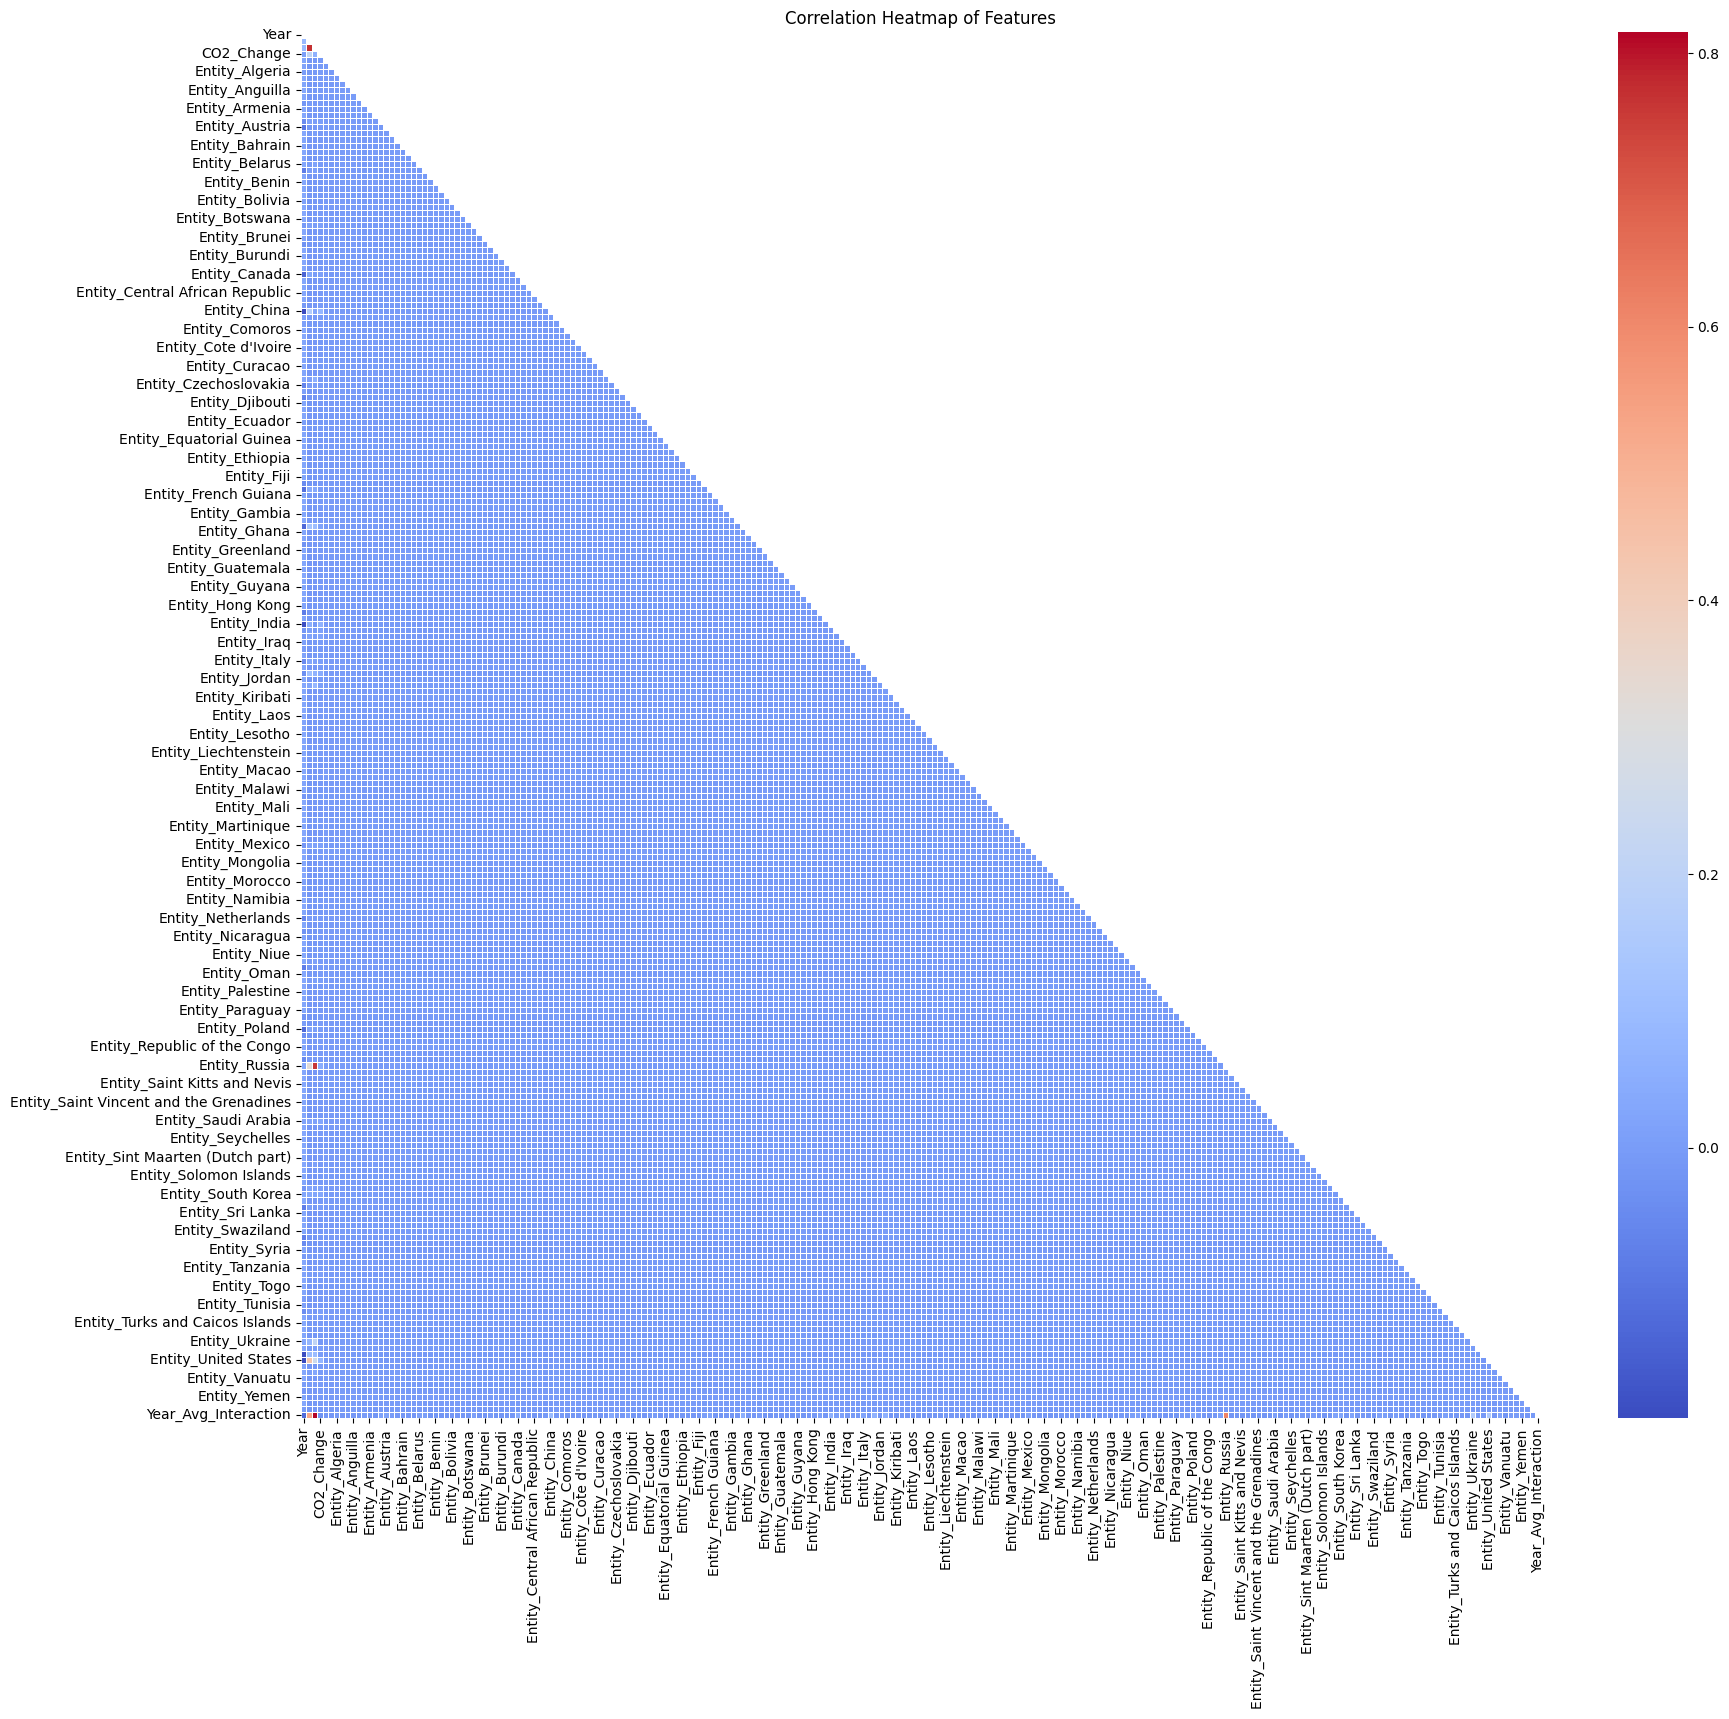

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_encoded_numeric = df_encoded.drop('Code', axis=1)
correlation_matrix = df_encoded_numeric.corr()

plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Heatmap of Features')
plt.show()

## Summary:

### Data Analysis Key Findings

* The 'Entity' column was successfully one-hot encoded, resulting in 221 new features representing unique entities.
* The numeric features, including 'Year', 'Annual CO₂ emissions (tonnes )' (after log transformation), 'Historical\_Avg\_CO2', and 'CO2\_Change', were scaled using `StandardScaler`.
* Three new features were engineered: 'Historical\_Avg\_CO2' (historical mean emissions per entity on log-transformed data), 'CO2\_Change' (year-over-year emission change per entity on log-transformed data), and 'Year\_Avg\_Interaction' (interaction term between scaled 'Year' and 'Historical\_Avg\_CO2').
* A correlation heatmap was generated, revealing relationships and potential multicollinearity among the features.
* The dataset was split into training (80%) and testing (20%) sets, resulting in training sets with 14703 samples and testing sets with 3676 samples.

### Insights or Next Steps

* Analyze the correlation heatmap to identify highly correlated features that might need to be addressed (e.g., through dimensionality reduction or feature selection) before model training.
* Remember that the target variable ('Annual CO₂ emissions (tonnes )') has been log-transformed. When evaluating model predictions, you will need to inverse transform the predictions to get the values back in the original scale (using `np.expm1`).
* Proceed with training a CO2 emission prediction model using the prepared `X_train` and `y_train` datasets and evaluate its performance on the `X_test` and `y_test` datasets.

## Train/test split

### Subtask:
Split the data into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
Split the data into training and testing sets.



In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded_numeric.drop('Annual CO₂ emissions (tonnes )', axis=1)
y = df_encoded_numeric['Annual CO₂ emissions (tonnes )']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14703, 225)
Shape of X_test: (3676, 225)
Shape of y_train: (14703,)
Shape of y_test: (3676,)


## Summary:

### Data Analysis Key Findings

*   The 'Entity' column was successfully one-hot encoded, resulting in 221 new features representing unique entities.
*   The numeric features, including 'Year', 'Annual CO₂ emissions (tonnes )', 'Historical\_Avg\_CO2', and 'CO2\_Change', were scaled using `StandardScaler`.
*   Three new features were engineered: 'Historical\_Avg\_CO2' (historical mean emissions per entity), 'CO2\_Change' (year-over-year emission change per entity), and 'Year\_Avg\_Interaction' (interaction term between scaled 'Year' and 'Historical\_Avg\_CO2').
*   A correlation heatmap was generated, revealing relationships and potential multicollinearity among the features.
*   The dataset was split into training (80%) and testing (20%) sets, resulting in training sets with 14703 samples and testing sets with 3676 samples.

### Insights or Next Steps

*   Analyze the correlation heatmap to identify highly correlated features that might need to be addressed (e.g., through dimensionality reduction or feature selection) before model training.
*   Proceed with training a CO2 emission prediction model using the prepared `X_train` and `y_train` datasets and evaluate its performance on the `X_test` and `y_test` datasets.
